In [1]:
import numpy as np
import pandas as pd
# set these so that I could see the entire dataframe while working
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# k-means from clustering to cluster data
from sklearn.cluster import KMeans
# folim for making maps
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



Read in the csv with all the Schools Latitude and Longitude

In [4]:
df=pd.read_csv('collegetest.csv')
df.head()

,School,Address,City,Type,Latitude,Longitude
0,Alverno College,3400 S 43rd st,Milwaukee,Master's university,42.983,-87.967
1,Beloit College,700 College St,Beloit,Baccalaureate college,42.503,-89.031
2,Cardinal Stritch University,6801 N Yates Rd,Milwaukee,Doctoral/research university,43.142,-87.906
3,Carroll University,100 N East Ave,Waukesha,Master's university,43.024,-88.221
4,Carthage College,2001 Alford Pard Dr,Kenosha,Baccalaureate college,42.622,-89.822


Create a map of Wisconsin showing all the Schools

In [5]:
map_wi = folium.Map(location=[43.784, -88.7879], zoom_start=7)
for lat, lng, School in zip(df['Latitude'], df['Longitude'], df['School'],):
    label = '{}'.format(School)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wi) 
map_wi

In [9]:
import requests 
from pandas.io.json import json_normalize

Make a call to FourSquare using the latitudes and longitudes of each school

In [10]:
CLIENT_ID = 
VERSION = '20190808'

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=3200):
    
    venues_list=[]   
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School', 
                  'School Latitude', 
                  'School Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
LIMIT=200
school_venues = getNearbyVenues(names=df['School'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



Alverno College
Beloit College
Cardinal Stritch University
Carroll University
Carthage College
Concordia University Wisconsin
Edgewood College
Lakeland University
Lawrence University
Maranatha Baptist University
Marian University
Marquette University
Medical College of Wisconsin
Milwaukee School of Engineering
Mount Mary University
Northland College
Ripon College
St. Norbert College
Silver Lake College
University of Wisconsin–Eau Claire
University of Wisconsin–Green Bay
University of Wisconsin–La Crosse
University of Wisconsin–Madison
University of Wisconsin–Milwaukee
University of Wisconsin–Oshkosh
University of Wisconsin–Parkside
University of Wisconsin–Platteville
University of Wisconsin–River Falls
University of Wisconsin–Stevens Point
University of Wisconsin–Stout
University of Wisconsin–Superior
University of Wisconsin–Whitewater
Viterbo University
Wisconsin Lutheran College


In [13]:
print(school_venues.shape)
school_venues.head()

(2367, 7)


,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alverno College,42.983,-87.967,Discount Liquor,42.988287,-87.977535,Liquor Store
1,Alverno College,42.983,-87.967,Leon's Frozen Custard,42.987796,-87.948607,Ice Cream Shop
2,Alverno College,42.983,-87.967,Ned's Pizza,42.985587,-87.947918,Pizza Place
3,Alverno College,42.983,-87.967,Starbucks,42.982769,-87.948887,Coffee Shop
4,Alverno College,42.983,-87.967,Scordato Italian Bakery & Deli,42.973493,-87.977361,Bakery


Repeat the process for the waukesha area

In [14]:
waukesha_df=pd.read_csv('waukesha.csv')
waukesha_df

,School,Address,City,Latitude,Longitude
0,Waukesha,1500 N. University Dr.,Waukesha,43.027,-88.269


In [15]:
waukesha_venues = getNearbyVenues(names=waukesha_df['School'],
                                   latitudes=waukesha_df['Latitude'],
                                   longitudes=waukesha_df['Longitude']
                                  )

Waukesha


In [16]:
print(waukesha_venues.shape)
waukesha_venues.head()

(74, 7)


,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Waukesha,43.027,-88.269,Qdoba Mexican Grill,43.041879,-88.257705,Mexican Restaurant
1,Waukesha,43.027,-88.269,Good Harvest Market,43.043403,-88.262803,Grocery Store
2,Waukesha,43.027,-88.269,Waukesha Sportscards,43.023138,-88.284457,Hobby Shop
3,Waukesha,43.027,-88.269,Culver's,43.039779,-88.256471,Fast Food Restaurant
4,Waukesha,43.027,-88.269,Cousins Subs of Waukesha - Grandview Blvd.,43.034281,-88.256335,Sandwich Place


Group the venues by type

In [17]:
# one hot encoding
waukesha_area = pd.get_dummies(waukesha_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
waukesha_area['School'] = waukesha_venues['School'] 

# move neighborhood column to the first column
fixed_columns = [waukesha_area.columns[-1]] + list(waukesha_area.columns[:-1])
waukesha_area = waukesha_area[fixed_columns]

waukesha_area.head()

,School,Airport,American Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,Bank,Bar,Basketball Court,Chinese Restaurant,Coffee Shop,Convenience Store,Diner,Discount Store,Donut Shop,Fast Food Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hobby Shop,Hotel,Intersection,Mexican Restaurant,Other Repair Shop,Park,Parking,Pet Store,Pharmacy,Pizza Place,Pool,Road,Salon / Barbershop,Sandwich Place,Shipping Store,Shopping Mall,Spa,Sports Bar,Steakhouse,Supplement Shop,Thrift / Vintage Store,Trail,Video Store,Water Park
0,Waukesha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Waukesha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Waukesha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Waukesha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Waukesha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
waukesha_grouped = waukesha_area.groupby('School').sum().reset_index()
waukesha_grouped

,School,Airport,American Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,Bank,Bar,Basketball Court,Chinese Restaurant,Coffee Shop,Convenience Store,Diner,Discount Store,Donut Shop,Fast Food Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hobby Shop,Hotel,Intersection,Mexican Restaurant,Other Repair Shop,Park,Parking,Pet Store,Pharmacy,Pizza Place,Pool,Road,Salon / Barbershop,Sandwich Place,Shipping Store,Shopping Mall,Spa,Sports Bar,Steakhouse,Supplement Shop,Thrift / Vintage Store,Trail,Video Store,Water Park
0,Waukesha,1,1,1,1,1,1,1,1,3,2,1,2,1,1,4,1,1,1,2,2,1,1,3,1,3,1,1,1,2,5,5,1,1,1,4,2,1,1,2,1,1,1,2,2,1


In [19]:
# one hot encoding
wi_area = pd.get_dummies(school_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
wi_area['School'] = school_venues['School'] 

# move neighborhood column to the first column
fixed_columns = [wi_area.columns[-1]] + list(wi_area.columns[:-1])
wi_area = wi_area[fixed_columns]

In [20]:
school_grouped=wi_area.groupby('School').sum().reset_index()
school_grouped.head()

,School,ATM,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Basketball Court,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Electronics Store,Event Space,Eye Doctor,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Park,Pelmeni House,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Physical Therapist,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Alverno College,0,0,0,0,3,0,0,0,0,1,2,0,0,0,0,1,2,5,0,9,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,1,0,4,0,2,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0,

Combine the waukesha_grouped and school_grouped to do k-means clustering

In [21]:
wi=pd.concat([school_grouped,waukesha_grouped],sort=False)

In [22]:
wi.fillna(0, inplace=True)

In [23]:
wi.reset_index(drop=True)

,School,ATM,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Basketball Court,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Electronics Store,Event Space,Eye Doctor,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Park,Pelmeni House,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Physical Therapist,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Airport,Auto Garage,Basketball Court,Other Repair Shop,Parking
0,Alverno College,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,1.0,2.0,0,0.0,0.0,0,1.0,2.0,5.0,0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0

Check the number of venues returned for each school

In [24]:
school_venues.groupby('School').count()

,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
School,,,,,,
Alverno College,100,100,100,100,100,100
Beloit College,76,76,76,76,76,76
Cardinal Stritch University,66,66,66,66,66,66
Carroll University,94,94,94,94,94,94
Concordia University Wisconsin,17,17,17,17,17,17
Edgewood College,100,100,100,100,100,100
Lakeland University,7,7,7,7,7,7
Lawrence University,100,100,100,100,100,100
Maranatha Baptist University,60,60,60,60,60,60


In [25]:
waukesha_venues.groupby('School').count()

,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
School,,,,,,
Waukesha,74,74,74,74,74,74


Run K-means clustering with 6 clusters

In [26]:
kclusters = 6
wi_clustering = wi.drop('School', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wi_clustering)
kmeans.labels_[0:10] 

array([2, 2, 1, 2, 1, 0, 1, 3, 2, 2], dtype=int32)

In [27]:
wi.insert(0, 'Cluster Labels', kmeans.labels_)

In [28]:
wi

,Cluster Labels,School,ATM,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Basketball Court,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Electronics Store,Event Space,Eye Doctor,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Park,Pelmeni House,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Physical Therapist,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Airport,Auto Garage,Basketball Court,Other Repair Shop,Parking
0,2,Alverno College,0.0,0.0,0.0,0.0,3,0.0,0.0,0.0,0.0,1.0,2.0,0,0.0,0.0,0,1.0,2.0,5.0,0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,1.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.

Create a data frame so I can add school information to the wi data frame with the clusters

In [29]:
wi_merged=pd.concat([df,waukesha_df],sort=False)

In [30]:
wi_merged.reset_index(drop=True)

,School,Address,City,Type,Latitude,Longitude
0,Alverno College,3400 S 43rd st,Milwaukee,Master's university,42.983,-87.967
1,Beloit College,700 College St,Beloit,Baccalaureate college,42.503,-89.031
2,Cardinal Stritch University,6801 N Yates Rd,Milwaukee,Doctoral/research university,43.142,-87.906
3,Carroll University,100 N East Ave,Waukesha,Master's university,43.024,-88.221
4,Carthage College,2001 Alford Pard Dr,Kenosha,Baccalaureate college,42.622,-89.822
5,Concordia University Wisconsin,12800 N Lake Shore Dr,Mequon,Master's university,43.254,-87.914
6,Edgewood College,1000 Edgewood College Dr,Madison,Doctoral/research university,43.059,-89.421
7,Lakeland University,W3718 South Dr,Plymouth,Master's university,43.842,-87.884
8,Lawrence University,711 E John St,Appleton,Baccalaureate college,44.260,-88.394
9,Maranatha Baptist University,745 W Main St,Watertown,Baccalaureate college,43.194,-88.739


In [33]:
wi_merged.drop(['Address','Type'],axis=1,inplace=True)

In [34]:
wi_merged.reset_index(drop=True,inplace=True)

In [36]:
wi_merged

,School,City,Latitude,Longitude
0,Alverno College,Milwaukee,42.983,-87.967
1,Beloit College,Beloit,42.503,-89.031
2,Cardinal Stritch University,Milwaukee,43.142,-87.906
3,Carroll University,Waukesha,43.024,-88.221
4,Carthage College,Kenosha,42.622,-89.822
5,Concordia University Wisconsin,Mequon,43.254,-87.914
6,Edgewood College,Madison,43.059,-89.421
7,Lakeland University,Plymouth,43.842,-87.884
8,Lawrence University,Appleton,44.260,-88.394
9,Maranatha Baptist University,Watertown,43.194,-88.739


Combine the wi and wi_merged data frames

In [37]:
wi_cluster = wi_merged.join(wi.set_index('School'), on='School')

In [38]:
wi_cluster.drop(df.index[4])

,School,City,Latitude,Longitude,Cluster Labels,ATM,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Basketball Court,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Electronics Store,Event Space,Eye Doctor,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Park,Pelmeni House,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Physical Therapist,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Airport,Auto Garage,Basketball Court,Other Repair Shop,Parking
0,Alverno College,Milwaukee,42.983,-87.967,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,0.0,0.0

In [39]:
wi_test=wi_cluster.loc[wi_cluster['Cluster Labels'] == 1.0]

In [40]:
wi_test

,School,City,Latitude,Longitude,Cluster Labels,ATM,Accessories Store,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Basketball Court,College Cafeteria,College Classroom,College Football Field,College Gym,College Quad,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Electronics Store,Event Space,Eye Doctor,Fabric Shop,Fair,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Park,Pelmeni House,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Physical Therapist,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Airport,Auto Garage,Basketball Court,Other Repair Shop,Parking
2,Cardinal Stritch University,Milwaukee,43.142,-87.906,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

Create another map of just the schools clustered with Waukesha

In [41]:
map_matchedschools = folium.Map(location=[43.784, -88.7879], zoom_start=7)
for lat, lng, School in zip(wi_test['Latitude'], wi_test['Longitude'], wi_test['School'],):
    label = '{}'.format(School)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_matchedschools) 
map_matchedschools

Create a list of venues that are only in the cluster with Waukesha

In [42]:
school_venues[school_venues['School'].isin(wi_test.School.unique())].head()

,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
176,Cardinal Stritch University,43.142,-87.906,Stone Creek Coffee,43.143716,-87.913295,Coffee Shop
177,Cardinal Stritch University,43.142,-87.906,Wisconsin Athletic Club,43.155687,-87.912980,Gym
178,Cardinal Stritch University,43.142,-87.906,Dr. Dawg,43.143414,-87.914264,Hot Dog Joint
179,Cardinal Stritch University,43.142,-87.906,Kletzsch Park,43.138219,-87.925061,Park
180,Cardinal Stritch University,43.142,-87.906,Harry & Rose Samson JCC,43.131436,-87.907198,Community Center


Now we will look at just specific venue catagories. First get a list of all venue catoagories from Waukesha

In [43]:
sorted(waukesha_area)

['Airport',
 'American Restaurant',
 'Athletics & Sports',
 'Auto Garage',
 'Automotive Shop',
 'Bank',
 'Bar',
 'Basketball Court',
 'Chinese Restaurant',
 'Coffee Shop',
 'Convenience Store',
 'Diner',
 'Discount Store',
 'Donut Shop',
 'Fast Food Restaurant',
 'Gift Shop',
 'Golf Course',
 'Grocery Store',
 'Gym',
 'Gym / Fitness Center',
 'Harbor / Marina',
 'Hobby Shop',
 'Hotel',
 'Intersection',
 'Mexican Restaurant',
 'Other Repair Shop',
 'Park',
 'Parking',
 'Pet Store',
 'Pharmacy',
 'Pizza Place',
 'Pool',
 'Road',
 'Salon / Barbershop',
 'Sandwich Place',
 'School',
 'Shipping Store',
 'Shopping Mall',
 'Spa',
 'Sports Bar',
 'Steakhouse',
 'Supplement Shop',
 'Thrift / Vintage Store',
 'Trail',
 'Video Store',
 'Water Park']

I choose a few venue catagories to see if we get better matches. Limit the wi data frame to the limited number of catagory

In [44]:
wi_limit = wi[['School','Sports Bar', 'Coffee Shop', 'Diner','Gym','Gym / Fitness Center','Mexican Restaurant','Pizza Place','Bank','Golf Course','Basketball Court']]

In [45]:
wi_limit

,School,Sports Bar,Coffee Shop,Diner,Gym,Gym / Fitness Center,Mexican Restaurant,Pizza Place,Bank,Golf Course,Basketball Court
0,Alverno College,0,3,1,0,2,6,5,0,0,0.0
1,Beloit College,0,1,1,1,1,3,3,0,0,0.0
2,Cardinal Stritch University,1,3,0,3,2,1,2,0,0,0.0
3,Carroll University,0,5,2,2,2,4,2,1,0,0.0
4,Concordia University Wisconsin,0,0,0,0,1,0,0,0,1,0.0
5,Edgewood College,0,5,0,0,0,2,5,0,0,0.0
6,Lakeland University,0,0,0,0,0,0,0,0,0,0.0
7,Lawrence University,0,2,1,0,2,4,8,0,1,0.0
8,Maranatha Baptist University,0,2,1,2,1,3,4,1,0,0.0
9,Marian University,2,2,0,0,3,1,4,2,1,0.0


Run k-means clustering on the limited data frame

In [47]:
kclusters = 6
wi_clustering2 = wi_limit.drop('School', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wi_clustering2)
kmeans.labels_[0:10] 

array([3, 5, 1, 1, 4, 0, 4, 3, 5, 5], dtype=int32)

In [48]:
wi_limit.insert(0, 'Cluster Labels', kmeans.labels_)

In [49]:
wi_limit

,Cluster Labels,School,Sports Bar,Coffee Shop,Diner,Gym,Gym / Fitness Center,Mexican Restaurant,Pizza Place,Bank,Golf Course,Basketball Court
0,3,Alverno College,0,3,1,0,2,6,5,0,0,0.0
1,5,Beloit College,0,1,1,1,1,3,3,0,0,0.0
2,1,Cardinal Stritch University,1,3,0,3,2,1,2,0,0,0.0
3,1,Carroll University,0,5,2,2,2,4,2,1,0,0.0
4,4,Concordia University Wisconsin,0,0,0,0,1,0,0,0,1,0.0
5,0,Edgewood College,0,5,0,0,0,2,5,0,0,0.0
6,4,Lakeland University,0,0,0,0,0,0,0,0,0,0.0
7,3,Lawrence University,0,2,1,0,2,4,8,0,1,0.0
8,5,Maranatha Baptist University,0,2,1,2,1,3,4,1,0,0.0
9,5,Marian University,2,2,0,0,3,1,4,2,1,0.0


In [50]:
wi_limit_cluster = wi_merged.join(wi_limit.set_index('School'), on='School')

In [51]:
wi_limit_cluster

,School,City,Latitude,Longitude,Cluster Labels,Sports Bar,Coffee Shop,Diner,Gym,Gym / Fitness Center,Mexican Restaurant,Pizza Place,Bank,Golf Course,Basketball Court
0,Alverno College,Milwaukee,42.983,-87.967,3.0,0.0,3.0,1.0,0.0,2.0,6.0,5.0,0.0,0.0,0.0
1,Beloit College,Beloit,42.503,-89.031,5.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0
2,Cardinal Stritch University,Milwaukee,43.142,-87.906,1.0,1.0,3.0,0.0,3.0,2.0,1.0,2.0,0.0,0.0,0.0
3,Carroll University,Waukesha,43.024,-88.221,1.0,0.0,5.0,2.0,2.0,2.0,4.0,2.0,1.0,0.0,0.0
4,Carthage College,Kenosha,42.622,-89.822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Concordia University Wisconsin,Mequon,43.254,-87.914,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,Edgewood College,Madison,43.059,-89.421,0.0,0.0,5.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0
7,Lakeland University,Plymouth,43.842,-87.884,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Lawrence University,Appleton,44.260,-88.394,3.0,0.0,2.0,1.0,0.0,2.0,4.0,8.0,0.0,1.0,0.0
9,Maranatha Baptist University,Watertown,43.194,-88.739,5.0,0.0,2.0,1.0,2.0,1.0,3.0,4.0,1.0,0.0,0.0


Create a data frame with all schools in the same cluster as Waukesha

In [52]:
wi_test_limit=wi_limit_cluster.loc[wi_limit_cluster['Cluster Labels'] == 5.0]

In [53]:
wi_test_limit

,School,City,Latitude,Longitude,Cluster Labels,Sports Bar,Coffee Shop,Diner,Gym,Gym / Fitness Center,Mexican Restaurant,Pizza Place,Bank,Golf Course,Basketball Court
1,Beloit College,Beloit,42.503,-89.031,5.0,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0
9,Maranatha Baptist University,Watertown,43.194,-88.739,5.0,0.0,2.0,1.0,2.0,1.0,3.0,4.0,1.0,0.0,0.0
10,Marian University,Fond du Lac,43.777,-88.421,5.0,2.0,2.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,0.0
15,Northland College,Ashland,46.581,-90.873,5.0,0.0,2.0,1.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0
17,St. Norbert College,De Pere,44.445,-88.068,5.0,1.0,3.0,1.0,4.0,2.0,3.0,6.0,0.0,0.0,0.0
26,University of Wisconsin–Platteville,Platteville,42.733,-90.484,5.0,0.0,1.0,0.0,1.0,1.0,3.0,5.0,0.0,1.0,0.0
29,University of Wisconsin–Stout,Menomonie,44.875,-91.929,5.0,0.0,1.0,0.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0
30,University of Wisconsin–Superior,Superior,46.719,-92.087,5.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0
31,University of Wisconsin–Whitewater,Whitewater,42.834,-88.753,5.0,1.0,1.0,0.0,1.0,1.0,3.0,4.0,0.0,1.0,0.0
34,Waukesha,Waukesha,43.027,-88.269,5.0,2.0,2.0,2.0,2.0,2.0,3.0,5.0,1.0,1.0,1.0


Create a map with these schools

In [54]:
map_matchedschools2 = folium.Map(location=[43.784, -88.7879], zoom_start=7)
for lat, lng, School in zip(wi_test_limit['Latitude'], wi_test_limit['Longitude'], wi_test_limit['School'],):
    label = '{}'.format(School)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_matchedschools2) 
map_matchedschools2

In [55]:
school_venues[school_venues['School'].isin(wi_test_limit.School.unique())].head()

,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
100,Beloit College,42.503,-89.031,Merrill & Houston's Steak Joint,42.501016,-89.034139,American Restaurant
101,Beloit College,42.503,-89.031,615 Club,42.498880,-89.030198,American Restaurant
102,Beloit College,42.503,-89.031,Bushel & Peck's,42.499538,-89.035688,Food & Drink Shop
103,Beloit College,42.503,-89.031,Ironworks Hotel,42.501129,-89.034082,Hotel
104,Beloit College,42.503,-89.031,Tilley's Pizza House & Ballyhoo Tavern,42.507632,-89.038463,Pizza Place


Generate a list of all the schools clustered with Waukesha

In [57]:
wi_test_limit.School.unique()

array(['Beloit College', 'Maranatha Baptist University',
       'Marian University', 'Northland College', 'St. Norbert College',
       'University of Wisconsin–Platteville',
       'University of Wisconsin–Stout',
       'University of Wisconsin–Superior',
       'University of Wisconsin–Whitewater', 'Waukesha'], dtype=object)

In [58]:
[['School','Sports Bar', 'Coffee Shop', 'Diner','Gym','Gym / Fitness Center','Mexican Restaurant','Pizza Place','Bank','Golf Course','Basketball Court']]

[['School',
  'Sports Bar',
  'Coffee Shop',
  'Diner',
  'Gym',
  'Gym / Fitness Center',
  'Mexican Restaurant',
  'Pizza Place',
  'Bank',
  'Golf Course',
  'Basketball Court']]

The rest of the notebook is to create tables and charts for the report and the presentation.

In [59]:
school_choice_1=school_venues[school_venues['School']==('Beloit College')]
school_choice_1

,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
100,Beloit College,42.503,-89.031,Merrill & Houston's Steak Joint,42.501016,-89.034139,American Restaurant
101,Beloit College,42.503,-89.031,615 Club,42.498880,-89.030198,American Restaurant
102,Beloit College,42.503,-89.031,Bushel & Peck's,42.499538,-89.035688,Food & Drink Shop
103,Beloit College,42.503,-89.031,Ironworks Hotel,42.501129,-89.034082,Hotel
104,Beloit College,42.503,-89.031,Tilley's Pizza House & Ballyhoo Tavern,42.507632,-89.038463,Pizza Place
105,Beloit College,42.503,-89.031,Beloit Farmer's Market,42.499642,-89.035548,Farmers Market
106,Beloit College,42.503,-89.031,Zen Sushi & Grill,42.499553,-89.034680,Sushi Restaurant
107,Beloit College,42.503,-89.031,"Everett's Wines, Spirits And Beer",42.492459,-89.035704,Liquor Store
108,Beloit College,42.503,-89.031,Barnes & Noble,42.499620,-89.034140,Bookstore
109,Beloit College,42.503,-89.031,Jerry's Cafe,42.508382,-89.037608,Café


In [60]:
school_choice_1a=school_choice_1.loc[school_choice_1['Venue Category'] == 'Pizza Place']

In [61]:
school_choice_1a

,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
104,Beloit College,42.503,-89.031,Tilley's Pizza House & Ballyhoo Tavern,42.507632,-89.038463,Pizza Place
137,Beloit College,42.503,-89.031,Pizza Hut,42.505454,-89.038283,Pizza Place
146,Beloit College,42.503,-89.031,Papa John's Pizza,42.493209,-89.037700,Pizza Place


In [62]:
sc1=school_choice_1.loc[school_choice_1['Venue Category'].isin(['School','Sports Bar', 'Coffee Shop', 'Diner','Gym','Gym / Fitness Center','Mexican Restaurant','Pizza Place','Bank','Golf Course','Basketball Court'])]

In [63]:
sc1.drop(['School Latitude',"School Longitude",'Venue Latitude', 'Venue Longitude'],axis=1)

,School,Venue,Venue Category
104,Beloit College,Tilley's Pizza House & Ballyhoo Tavern,Pizza Place
117,Beloit College,La Casa Grande,Mexican Restaurant
119,Beloit College,Bagels & More,Coffee Shop
135,Beloit College,Planet Fitness,Gym / Fitness Center
137,Beloit College,Pizza Hut,Pizza Place
139,Beloit College,Stateline Family YMCA,Gym
145,Beloit College,Taco John's,Mexican Restaurant
146,Beloit College,Papa John's Pizza,Pizza Place
160,Beloit College,Taqueria Azteca,Mexican Restaurant
166,Beloit College,Denny's,Diner


In [67]:
school_choice_2=school_venues[school_venues['School']==('Maranatha Baptist University')]

In [68]:
sc2=school_choice_2.loc[school_choice_2['Venue Category'].isin(['School','Sports Bar', 'Coffee Shop', 'Diner','Gym','Gym / Fitness Center','Mexican Restaurant','Pizza Place','Bank','Golf Course','Basketball Court'])]

In [69]:
sc2

,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
565,Maranatha Baptist University,43.194,-88.739,Taqueria Maria's,43.191998,-88.724312,Mexican Restaurant
567,Maranatha Baptist University,43.194,-88.739,El Mariachi,43.173511,-88.732572,Mexican Restaurant
568,Maranatha Baptist University,43.194,-88.739,Tribeca GalleryCafe & Books,43.193730,-88.721100,Coffee Shop
569,Maranatha Baptist University,43.194,-88.739,Anytime Fitness,43.189850,-88.739770,Gym / Fitness Center
573,Maranatha Baptist University,43.194,-88.739,Amados,43.193932,-88.721078,Mexican Restaurant
574,Maranatha Baptist University,43.194,-88.739,Zwieg's Grill,43.193299,-88.715461,Diner
585,Maranatha Baptist University,43.194,-88.739,Papa Murphy's,43.187512,-88.731687,Pizza Place
590,Maranatha Baptist University,43.194,-88.739,Latté Donatté,43.193607,-88.719959,Coffee Shop
591,Maranatha Baptist University,43.194,-88.739,Watertown Area YMCA,43.190787,-88.717148,Gym
592,Maranatha Baptist University,43.194,-88.739,Rock River Pizza,43.195043,-88.723764,Pizza Place


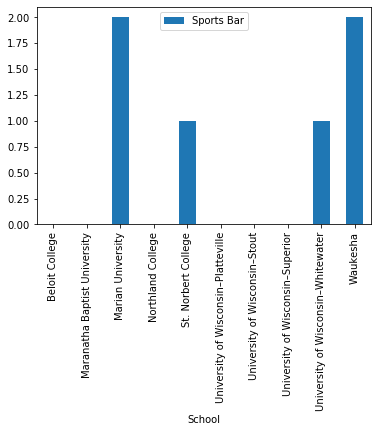

In [72]:
sports_bar = wi_test_limit.plot.bar(x='School', y='Sports Bar', rot=90)

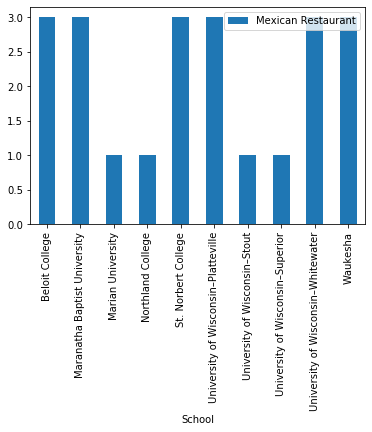

In [71]:
mr_bar = wi_test_limit.plot.bar(x='School', y='Mexican Restaurant', rot=90)

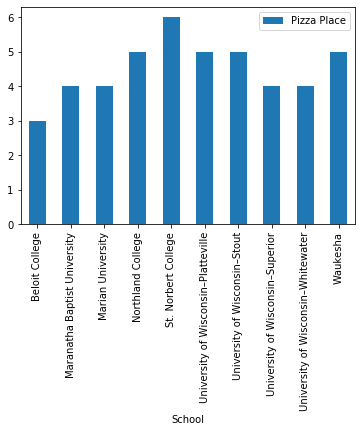

In [73]:
pizza = wi_test_limit.plot.bar(x='School', y='Pizza Place', rot=90)